# «Космические братья» - формирование модели монетизации

# Краткий общий вывод

**- Сформирована модель монетизации игрового приложения и произведен расчет при демонстрации рекламы на экране с выбором типа объекта для постройки('spaceport','assembly_shop') стоимостью - 0,07. Не показывая рекламу при постройке "research_center".**
    

**- При этом условии LTV достигает 2.5, а также окупаются следующие источники рекламы (Youtube - 1.46, Яндекс.Директ - 1.26).**

**- Учитывая полученные в ходе анализа показатели, имеет смысл отказаться (или ограничить) от рекламы на facebook и instagram и сосредоточиться на рекламе в Yandex.Директ и YouTube.**

**- Согласно текущей модели монетизации сервиса, выручка с клиента зависит от количества построенных им объектов. Значит, нам выгоднее пользователи, предпочитающие стратегию строительства. Возможно, стоит сбалансировать игровые стратегии, выровняв время прохождения уровня, чтобы сделать строительство более привлекательным для игроков.**

# Содержание

- Шаг 1. Обзор данных
- Шаг 2. Предобработка данных
- Шаг 3. Исследовательский анализ данных
- 3.1 Общая информация
- 3.2 Количество пользователей и событий за период (всего и по источнику)
- 3.3 Количество пользователей прошедших уровень
- 3.4 Количество построенных зданий за весь период
- 3.5 Анализ игровых стратегий пользователей (боевая/строительная - всего и по источнику)
- 3.6 Количество использованных источников трафика
- 3.7 Количество пользователей пришедших с каждого источника трафика
- Шаг 4 Расчём метрик
- 4.1 DAU, WAU,MAU, Sticky factor
- 4.2 Retention Rate
- 4.3 CAC
- Шаг 5. Проверка статистических гипотез
- 5.1 Время завершения уровня различается в зависимости от способа прохождения
- 5.2 Количество построенных объектов не зависит от способа прохождения уровня
- 5.3 Динамика строительства зданий у клиентов с вероятностью ухода и в среднем по остальной выборке
- 5.4 Количество построенных объектов не зависит от источника трафика
- Шаг 6 Модель монетизации
- 6.1 Прогнозирование LTV
- 6.2 ROMI по когортам
- 6.3 ROMI по источникам рекламы
- Шаг 7 Общий вывод и рекомендации

# Шаг 1. Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st
from IPython.core.display import display
import plotly.graph_objs as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None

In [3]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

Создадим класс со свойствами шрифтов:

In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [5]:
df_list = [game_actions,ad_costs,user_source]
for df in df_list:
    print('Первые 5 строк')
    print('-'*50)
    display(df.head())
    print('-'*50)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('-'*50)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*50)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*50)
    print('Наличие пропусков')
    print('-'*50)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*50)
    display(df.describe())

Первые 5 строк
--------------------------------------------------


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (135640, 5)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
None
--------------------------------------------------
Наличие дубликатов: 1
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64
Стат данные
------

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 12:35:56,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


Первые 5 строк
--------------------------------------------------


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (28, 3)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
source    0
day       0
cost      0
dtype: int64
Стат данные
--------------------------------------------------


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


Первые 5 строк
--------------------------------------------------


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (13576, 2)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
user_id    0
source     0
dtype: int64
Стат данные
--------------------------------------------------


,user_id,source
count,13576,13576
unique,13576,4
top,0001f83c-c6ac-4621-b7f0-8a28b283ac30,yandex_direct
freq,1,4817


- В нашем распоряжении 135640 событий от 13576 уникальных пользователей.
- В датасетах ad_costs и game_actions необходимо сконвертировать столбцы в формат даты.
- В датасете game_actions имеется 1 дубликат.
- В датасете game_actions имеются пропуски в колонках building_type и project_type (рассмотрим их ниже)

# Шаг 2. Предобработка данных

In [6]:
ad_costs['day'] = ad_costs['day'].astype('datetime64[s]')

In [7]:
game_actions['event_datetime'] = game_actions['event_datetime'].astype('datetime64[s]')

удалим дубликат:

In [8]:
game_actions = game_actions.drop_duplicates()

Проверка пропущенных значений:

In [9]:
game_actions[game_actions['building_type'].isna()]['event'].value_counts()

finished_stage_1    5817
project             1866
Name: event, dtype: int64

In [10]:
game_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [11]:
game_actions['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

- Пропуски в столбце building_type появляются, если пользователь завершил уровень ( заполнения не требуется ).
- Пропуски в столбце project_type полностью соответствует заполненным данным с типом проекта 'satellite_orbital_assembly',соответственно данные верны и заполнения также не требуется.
- Данные готовы для дальнейшего анализа

# Шаг 3. Исследовательский анализ данных

## 3.1 Общая информация

Добавим в game_actions необходимые для анализа поля:

In [12]:
game_actions['date'] = game_actions['event_datetime'].dt.date
game_actions['month'] = game_actions['event_datetime'].dt.month
game_actions['week'] = game_actions['event_datetime'].dt.week
game_actions['weekday'] = game_actions['event_datetime'].dt.day_name()
game_actions['hour'] = game_actions['event_datetime'].dt.hour

Добавим в game_actions информацию об источнике, из которого пришёл пользователь:

In [13]:
game_actions = game_actions.merge(user_source, how='left', on='user_id')

## 3.2 Количество пользователей и событий за период (всего и по источнику)

In [14]:
def game_period(df, period, period_name):  
    game = (df.groupby(period)
                  .agg(
                      user_count = ('user_id','nunique'),
                      event_count = ('user_id','count'))
             )
    game['events_per_user'] = game['event_count'] /  game['user_count']
    game = game.sort_values(by=period)
    game[['user_count', 'event_count']].plot(figsize=(15,5), kind='bar', grid=True,
                                               title='Количество пользователей/событий в '+ period_name)
    plt.xlabel('')
    plt.ylabel('количество пользователей/событий')
    plt.legend(['пользователи','события'])
    plt.show()

    plt.figure(figsize=(12,6))
    sns.distplot(game['user_count'], bins=10, label='пользователи')
    sns.distplot(game['event_count'], bins=10, label='события')
    plt.title('Распределение количества пользователей/событий в ' + period_name)
    plt.xlabel('')
    plt.legend()
    plt.show() 
    
    display(game.describe())

Посмотрим, как распределено количество уникальных пользователей и количество событий в день:

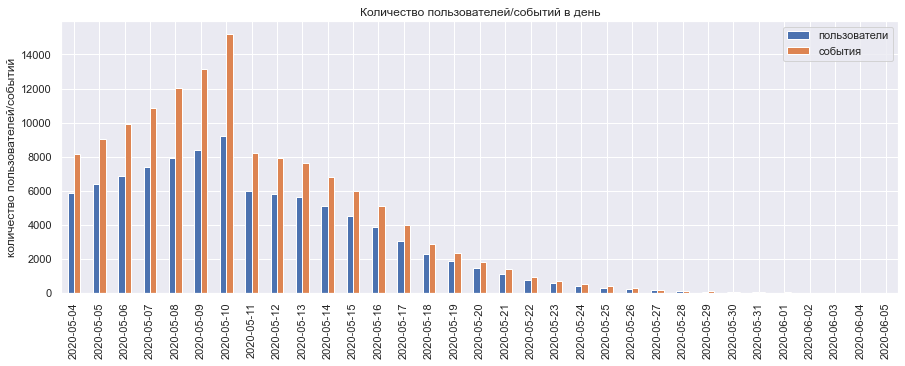

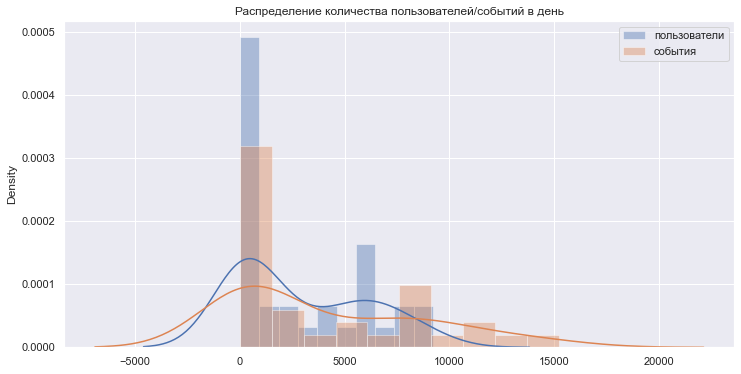

,user_count,event_count,events_per_user
count,33.000000,33.000000,33.000000
mean,2884.878788,4110.272727,1.333484
std,3083.784493,4639.714311,0.106301
min,4.000000,5.000000,1.215385
25%,91.000000,118.000000,1.252160
50%,1480.000000,1837.000000,1.296703
75%,5776.000000,7918.000000,1.370845
max,9219.000000,15207.000000,1.649528


In [15]:
game_period(game_actions, ['date'], 'день')

- Среднее количество пользователей в день: 2884 (минимум - 4, максимум - 9219). Распределение смещено вправо. Отчётливо видно границу, до которой количество пользователей и событий нарастает, а после снижается - это первая неделя игры ( Совпадает с концом маркетинговой компании).
- Среднее количество событий в день: 4110 (минимум - 5, максимум - 15207). Распределение так же смещено вправо.
- Среднее количество событий на пользователя: 1.33 (минимум - 1.215, максимум - 1.649) - не сильно колеблется с течением времени.

Теперь посмотрим в неделю:

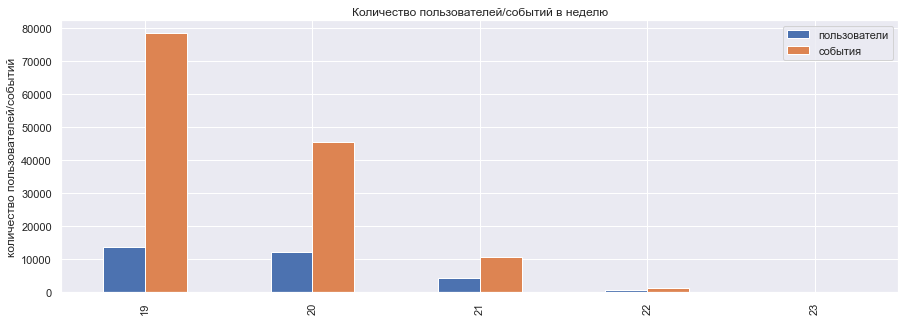

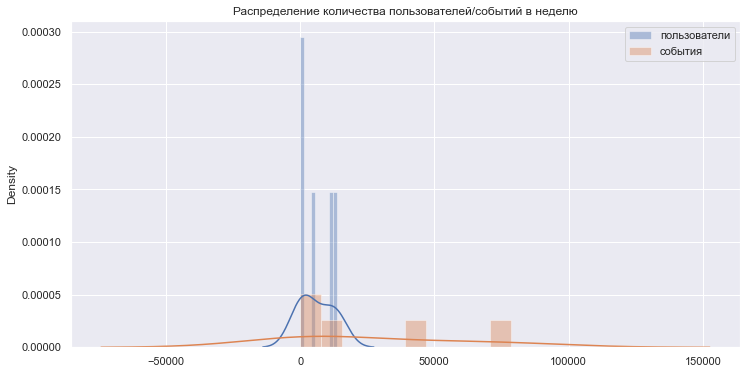

,user_count,event_count,events_per_user
count,5.00000,5.000000,5.000000
mean,6120.00000,27127.800000,3.230699
std,6387.00454,34115.225218,1.578515
min,29.00000,61.000000,2.099808
25%,521.00000,1094.000000,2.103448
50%,4353.00000,10517.000000,2.416035
75%,12121.00000,45563.000000,3.759013
max,13576.00000,78404.000000,5.775192


In [16]:
game_period(game_actions, ['week'], 'неделю')

- Среднее количество пользователей в неделю: 6120 (минимум - 29, максимум - 13576). Отчетливо заметно уменьшение с каждой неделей.
- Среднее количество событий в неделю: 27127 (минимум - 61, максимум - 78404). Сильно заметно, чтобы пройти уровень и пойти дальше недели вполне достаточно. Также этого же времени хватает, чтобы определиться нравится игра ,или нет.
- Среднее количество событий на пользователя: 3.23 (минимум - 2.09, максимум - 5.77) 

Посмотрим распределение по дням недели:

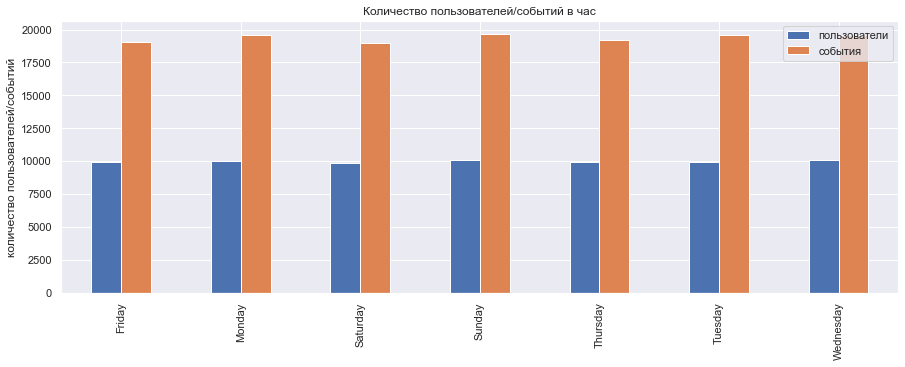

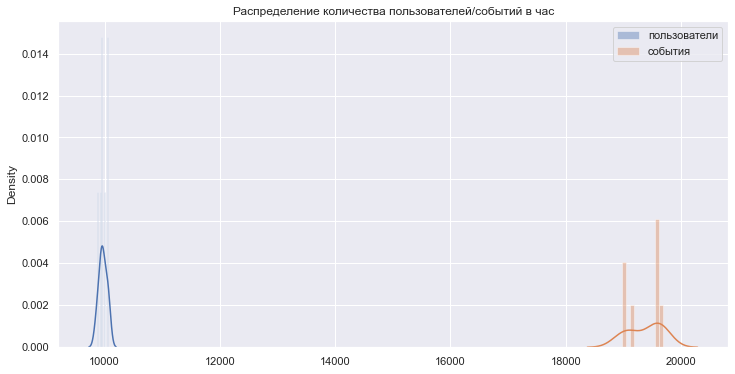

,user_count,event_count,events_per_user
count,7.000000,7.000000,7.000000
mean,9973.571429,19377.000000,1.942764
std,68.970663,297.112212,0.019703
min,9868.000000,18979.000000,1.918102
25%,9941.500000,19113.500000,1.925183
50%,9958.000000,19569.000000,1.946798
75%,10022.500000,19591.000000,1.959463
max,10061.000000,19682.000000,1.965154


In [17]:
game_period(game_actions, ['weekday'], 'час')

Распределение очень ровное, никаких закономерностей не заметно.

Посмотрим на распределение в течение суток:

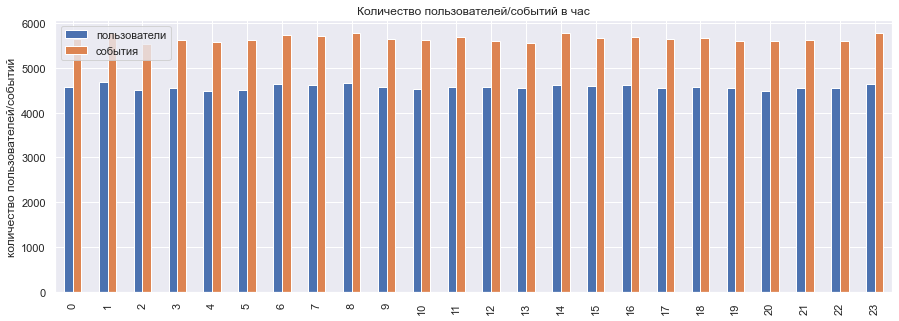

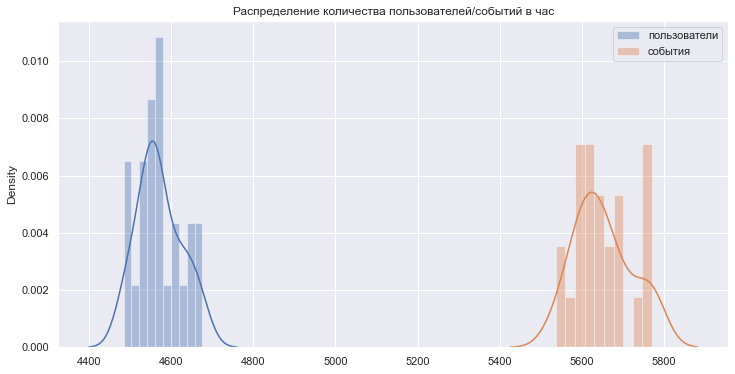

,user_count,event_count,events_per_user
count,24.000000,24.000000,24.000000
mean,4570.916667,5651.625000,1.236443
std,53.322576,69.613725,0.007238
min,4484.000000,5536.000000,1.218393
25%,4539.500000,5596.250000,1.232755
50%,4562.000000,5636.500000,1.235901
75%,4613.250000,5686.000000,1.241830
max,4676.000000,5771.000000,1.250650


In [18]:
game_period(game_actions, ['hour'], 'час')

В течение суток распределение довольно ровное. Значит анализируемая игра распостранилась в различных часовых поясах.

## 3.3 Количество пользователей прошедших уровень

В соответствии с описанием датасета game_actions, игроки (user_id), имеющие признак finished_stage_1 завершили первый уровень. Однако, в game_actions так же присутствуют игроки, имеющие признак project (реализация проекта), что в соответствии описанием так же является условием завершения игроком первого уровня. Проверим, есть ли игроки с project в finished_stage_1:

In [19]:
a = list(game_actions.query('event == "project"')['user_id'].unique())
b = list(game_actions.query('event == "finished_stage_1"')['user_id'].unique())
c = [e for e in a if e in b]
print('Количество уникальных игроков, имеющих одновременно признаки project и finished_stage_1: {:.0f}' .format(len(c)))

Количество уникальных игроков, имеющих одновременно признаки project и finished_stage_1: 1866


Игроки, одновременно имеющие признаки project и finished_stage_1, завершили первый уровень выполнив проект, остальные - победив врага.

In [20]:
builders_id = game_actions.query('project_type == "satellite_orbital_assembly"')['user_id'].to_list()
warriors_id = game_actions.query('(event == "finished_stage_1") and (user_id != @builders_id)')['user_id'].to_list()
winners_id = builders_id + warriors_id
andoned_id = list(game_actions.query('user_id != @winners_id')['user_id'].unique())
total_id = andoned_id + winners_id

print('Всего игроков: {:.0f}' .format(len(andoned_id) + len(winners_id)))
print('Всего игроков не достигших 1го уровня: {:.0f}' .format(len(andoned_id)),\
                    'или {:.0%} от общего числа игроков' .format(len(andoned_id) / (len(andoned_id) + len(winners_id))))
print('Всего игроков достигших 1го уровня: {:.0f}' .format(len(winners_id)),\
                    'или {:.0%} от общего числа игроков' .format(len(winners_id) / (len(andoned_id) + len(winners_id))))

Всего игроков: 13576
Всего игроков не достигших 1го уровня: 7759 или 57% от общего числа игроков
Всего игроков достигших 1го уровня: 5817 или 43% от общего числа игроков


In [21]:
print('Из них:')
print('- победивших врага: {:.0f}' .format(len(warriors_id)),\
                    'или {:.0%} от общего числа победителей' .format(len(warriors_id) / (len(winners_id))))
print('- реализуя проект: {:.0f}' .format(len(builders_id)),\
                    'или {:.0%} от общего числа победителей' .format(len(builders_id) / (len(winners_id))))

Из них:
- победивших врага: 3951 или 68% от общего числа победителей
- реализуя проект: 1866 или 32% от общего числа победителей


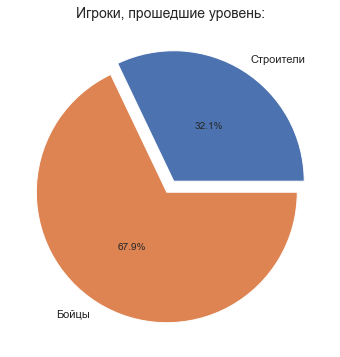

In [22]:
warriors = len(warriors_id)
builders = len(builders_id)
players = pd.Series([builders, warriors], index=['Строители','Бойцы'])
pie, ax = plt.subplots(figsize=[10,6])
labels = players.keys()
plt.pie(x=players, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Игроки, прошедшие уровень:", fontsize=14);

plt.show()

Из 13676 наших игроков 7759, или 57% от общего числа прошли первый уровень. В целом конечно, обычно первые уровни в игра,как правило просты, и исполняют функцию завлечь. Так что 43% не прошедших первый уровень вызывает вопросы.
    
67.9% прошедших уровень по пути победы над первым врагом c определённой долей вероятности говорит нам о том,что наши игроки предпочитают PvP, или так проще и быстрее (выясним это далее ). 

## 3.4 Количество построенных зданий за весь период

In [23]:
game_building = game_actions['event'].value_counts().reset_index().rename({'event':'event_cnt'}, axis=1)
game_building['%_of_total'] = (game_building['event_cnt'] / game_building['event_cnt'].sum()).round(2)
display(game_building)

,index,event_cnt,%_of_total
0,building,127956,0.94
1,finished_stage_1,5817,0.04
2,project,1866,0.01


,index,building_type_cnt,%_of_total
0,spaceport,59325,0.46
1,assembly_shop,54494,0.43
2,research_center,14137,0.11


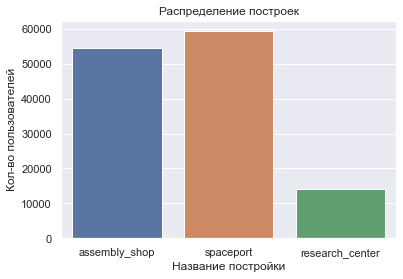

In [24]:
buildingtype = game_actions['building_type'].value_counts().reset_index().rename({'building_type':'building_type_cnt'}, axis=1)
buildingtype['%_of_total'] = (buildingtype['building_type_cnt'] / buildingtype['building_type_cnt'].sum()).round(2)
display(buildingtype)

sns.countplot(game_actions['building_type'])
plt.title('Распределение построек')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Название постройки');

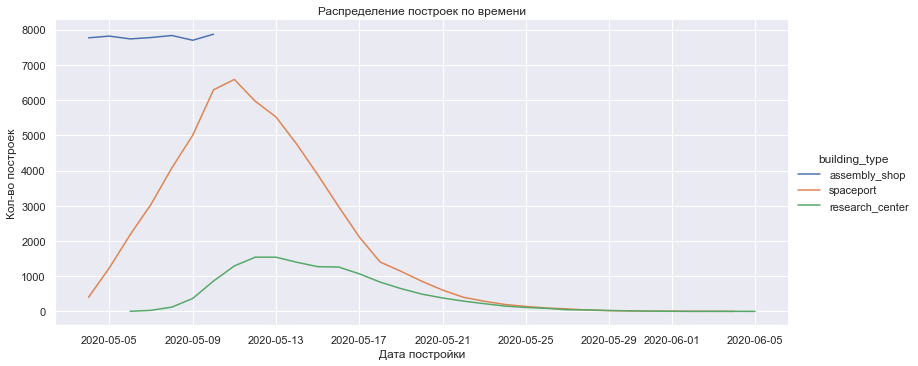

In [25]:
buildingtype = game_actions.groupby(['date', 'building_type'])['user_id'].count().reset_index()
sns.relplot(data=buildingtype, x='date', y='user_id', hue='building_type', kind='line', aspect=18/8)
plt.title('Распределение построек по времени')
plt.ylabel('Кол-во построек')
plt.xlabel('Дата постройки');

Всего игроками было построено 127956 построек : 59325 космопортов, 54494 сборочный цехов и 14137 исследовательских центров.
Из данного графика можно увидеть, что первая постройка пользователей - сборочный цех, которая, скорее всего строится игроками первой (возможно в рамках обучения ),  следом доступен для строительства космопорт и последним исследовательский центр.

## 3.5 Анализ игровых стратегий пользователей (боевая/строительная - всего и по источнику)  

Добавим в таблицу событий поле с текущим статусом игрока:

In [26]:
EVENTS_BY_USER = game_actions.groupby('user_id')['event'].unique()

In [27]:
def level_status(row):
    """
    Функция вычисляет текущий статус прохождения уровня для события `row`.
    """
    if row['event'] == 'project': # проект завершён
        return 'built_project'
    if row['event'] == "finished_stage_1": # первый уровень завершён
        if 'project' in EVENTS_BY_USER[row['user_id']]: # и была построена орбитальная сборка спутников
            return 'built_project'
        else:                                           # проекта не было
            return 'defeated_first_enemy' 
    else:
        return 'in_process'

In [28]:
game_actions['level_progress'] = game_actions.apply(lambda x: level_status(x), axis=1)

Построим отчёт по пользователям:

In [29]:
user_report = game_actions.groupby(['user_id', 'event'])['user_id'].count().unstack(level=1).reset_index()
user_report = user_report.drop(columns = ['finished_stage_1', 'project'])

Добавим информацию о количестве построенных объектов каждого типа:

In [30]:
building_count = game_actions.groupby(['user_id', 'building_type'])['user_id'].count().unstack(level=1).reset_index()
user_report = user_report.merge(building_count, how='left', on='user_id')

Добавим информацию об источнике, из которого пришёл пользователь:

In [31]:
user_report = user_report.merge(user_source, how='left', on='user_id')

Добавим информацию о первом действии пользователя в игре:

In [32]:
first_event = game_actions.groupby(['user_id']).agg(first_event_datetime = ('event_datetime', 'min')).reset_index()
user_report = user_report.merge(first_event, how='left', on='user_id')

Добавим информацию о последнем статусе пользователя в игре:

In [33]:
last_progress = game_actions.groupby(['user_id'])['event_datetime'].max().reset_index()
last_progress = last_progress.merge(game_actions, how='left', left_on=['user_id', 'event_datetime'], right_on=['user_id', 'event_datetime'])

In [34]:
last_progress = last_progress.drop(columns = ['event', 'building_type', 'project_type', 'date', 'week', 'hour', 'source'])
last_progress.rename(columns = {'event_datetime':'last_event_datetime', 'level_progress':'last_level_progress'}, inplace = True)
user_report = user_report.merge(last_progress, how='left', on='user_id')

Добавим в отчёт по пользователям поле с разницей между первым и последним событием в игре:

In [39]:
user_report['game_duration_h'] = (user_report['last_event_datetime'] - user_report['first_event_datetime']).astype('timedelta64[h]')
user_report['game_duration_d'] = (user_report['last_event_datetime'] - user_report['first_event_datetime']).astype('timedelta64[D]')

In [40]:
def distribution(df, param, hue, title):
    """
    Функция строит график распределения параметра и выводит его средние значения по заданному разрезу.
    Входные параметры:
        `df` - датафрейм
        `param` - поле датафрейма, по которому нужно построить распределение
        `hue` - поле для фильтрации датафрейма
        `title` - заголовок для графика
    """
    plt.figure(figsize=(15,10))
    plt.title(title)
    for element in df[hue].unique():
        sns.distplot(df[df[hue] == element][param], label = element,bins = 20)
    plt.legend()
    plt.xlabel('')
    plt.show()
    display(df.groupby(hue).agg(param_mean = (param, 'mean'))
                                                    .sort_values('param_mean', ascending=False))

In [41]:
user_report_1 = user_report[user_report['source'].isin(['facebook_ads', 'instagram_new_adverts'])]

In [42]:
user_report_2 = user_report[user_report['source'].isin(['yandex_direct', 'youtube_channel_reklama'])]

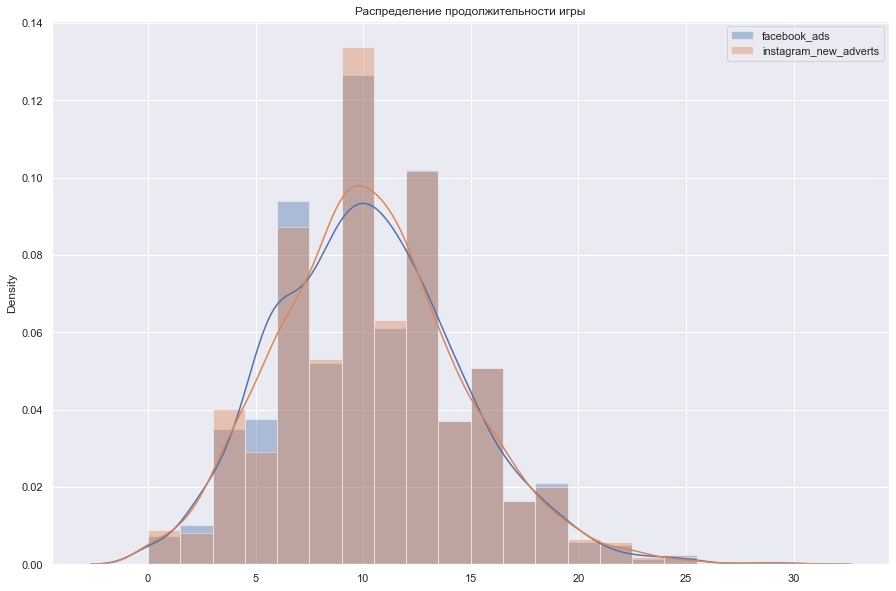

,param_mean
source,
instagram_new_adverts,10.289812
facebook_ads,10.223404


In [43]:
distribution(user_report_1, 'game_duration_d','source', 'Распределение продолжительности игры')

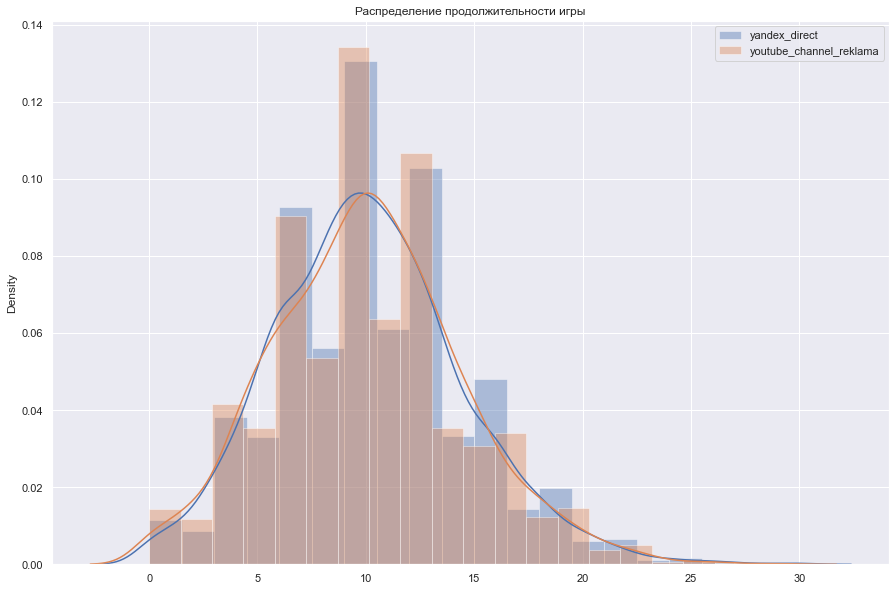

,param_mean
source,
yandex_direct,10.121652
youtube_channel_reklama,10.080045


In [44]:
distribution(user_report_2, 'game_duration_d','source', 'Распределение продолжительности игры')

-  Продолжительность игры практически не зависит от источника, из которого пришёл пользователь.
-  Продолжительность распределена нормально.
-  Средняя продолжительность игры - 10 дней

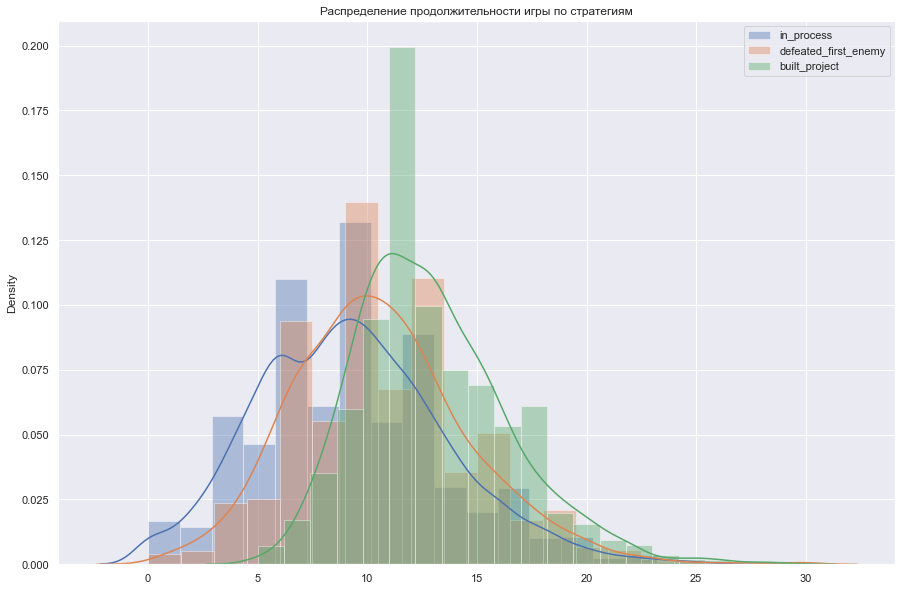

,param_mean
last_level_progress,
built_project,12.963023
defeated_first_enemy,10.606176
in_process,9.285475


In [45]:
distribution(user_report, 'game_duration_d', 'last_level_progress', 'Распределение продолжительности игры по стратегиям')

- Распределения продолжительности игры по стратегиям стремятся к нормальному.
- В среднем больше всего времени занимает прохождение уровня путём Разработки орбитальной сборки спутников - 13 дней.
- На втором месте по продолжительности - завершение уровня после Победы над первым врагом - 10-11 дней. 
- Игроки, не прошедшие первый уровень, в среднем провели в игре 9 дней.

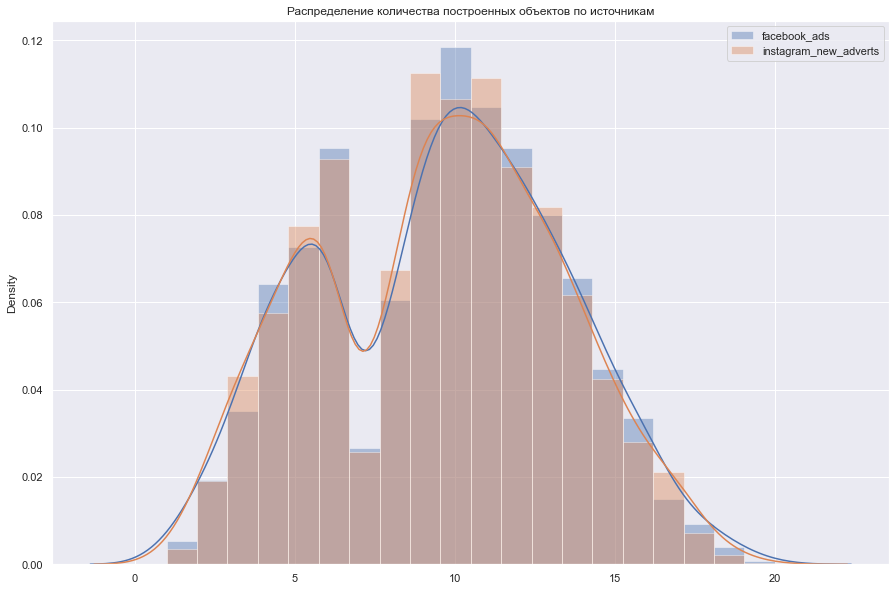

,param_mean
source,
facebook_ads,9.585840
instagram_new_adverts,9.505527


In [46]:
distribution(user_report_1, 'building', 'source', 'Распределение количества построенных объектов по источникам')

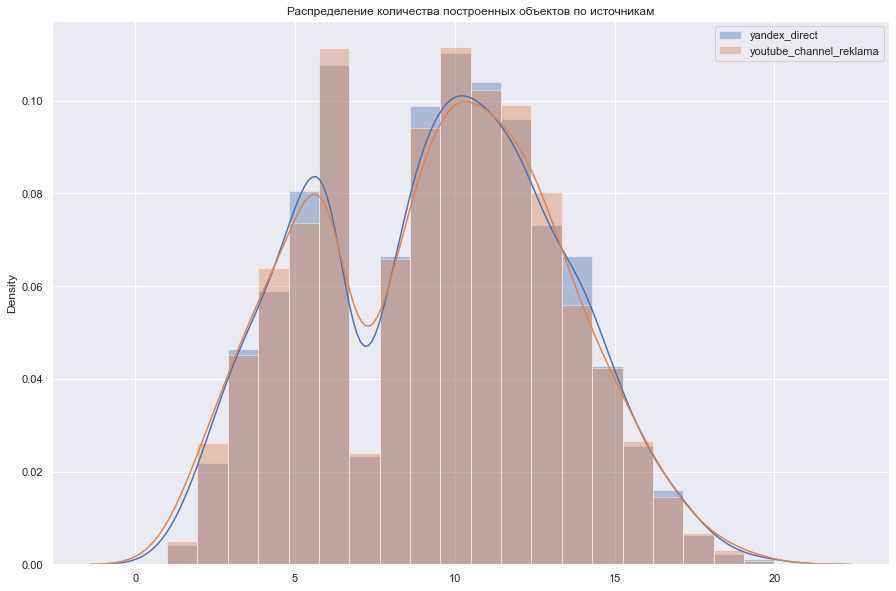

,param_mean
source,
yandex_direct,9.348557
youtube_channel_reklama,9.299330


In [47]:
distribution(user_report_2, 'building', 'source', 'Распределение количества построенных объектов по источникам')

- Зависимость количества построенных объектов от источника, из которого пришёл пользователь, не прослеживается.
- Отчётливо видно две вершины в распределении. Возможно 6 зданий, минимальный порог для открытия возможности напасть на другово игрока или до этого момента доводит обязательное обучение   

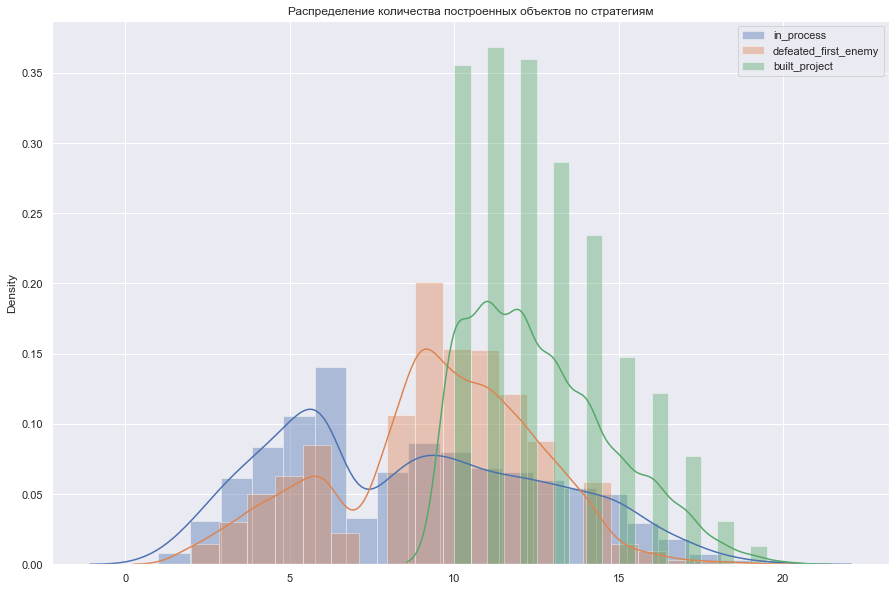

,param_mean
last_level_progress,
built_project,12.647910
defeated_first_enemy,9.411541
in_process,8.657043


In [48]:
distribution(user_report, 'building', 'last_level_progress', 'Распределение количества построенных объектов по стратегиям')

- Больше всего объектов в среднем построили пользователи, прошедшие уровень за счёт Разработки орбитальной сборки спутников - 12.6. 
-  На втором месте игроки, победившие первого врага - 9.4. 
-  Люди, не прошедшие уровень, в среднем построили 8.7 объектов.
- Ещё больше склоняюсь,что провал на 6 построенных зданиях, связан с возможностью начать активные боевые действия.

## 3.6 Количество использованных источников трафика

In [49]:
ad_costs.source.value_counts()

facebook_ads               7
instagram_new_adverts      7
yandex_direct              7
youtube_channel_reklama    7
Name: source, dtype: int64

In [50]:
print('Потрачено на маркетинг {} у.е.'.format(ad_costs['cost'].sum()))

Потрачено на маркетинг 7603.576986788023 у.е.


In [51]:
ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()

,source,cost
0,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
2,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


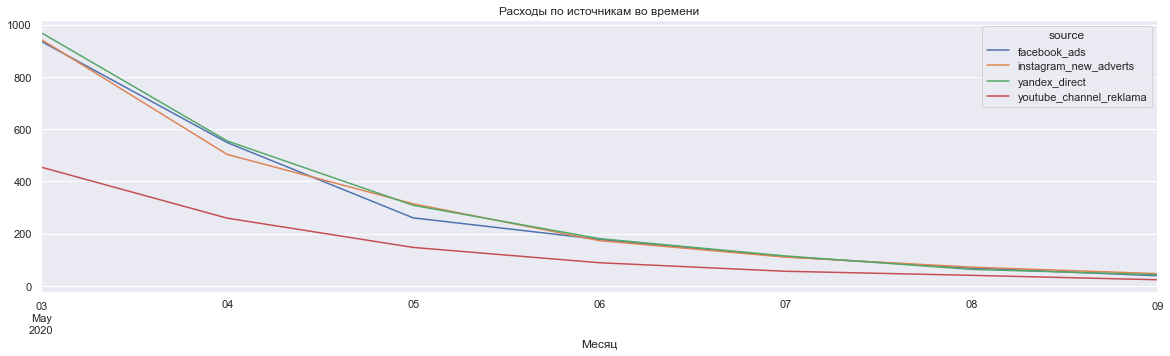

In [52]:
costs_pivot = ad_costs.pivot_table(index = 'day', columns = 'source', values = 'cost', aggfunc = 'sum')
costs_pivot.plot(figsize = (20, 5), title = 'Расходы по источникам во времени')
plt.xlabel('Месяц')
plt.show()

day,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,total
source,,,,,,,,
facebook_ads,935.882786,548.354480,260.185754,177.982200,111.766796,68.009276,38.723350,2140.904643
instagram_new_adverts,943.204717,502.925451,313.970984,173.071145,109.915254,71.578739,46.775400,2161.441691
yandex_direct,969.139394,554.651494,308.232990,180.917099,114.429338,62.961630,42.779505,2233.111449
youtube_channel_reklama,454.224943,259.073224,147.041741,88.506074,55.740645,40.217907,23.314669,1068.119204
total,3302.451840,1865.004649,1029.431469,620.476519,391.852033,242.767553,151.592924,7603.576987


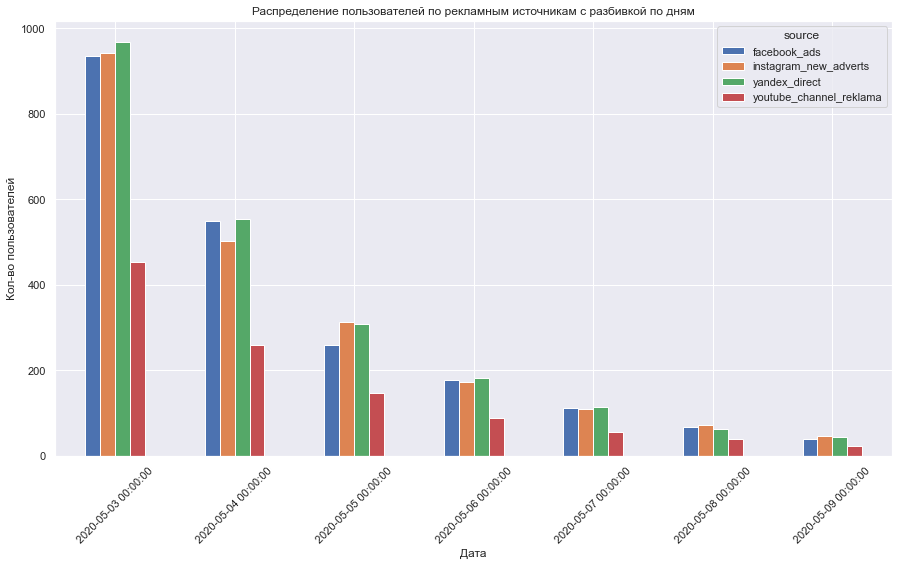

In [53]:
display(ad_costs.pivot_table(index='source', columns='day', values='cost', aggfunc='sum', margins=True, margins_name='total'))

ad_costs_pivot = ad_costs.pivot_table(index='source', columns='day', values='cost', aggfunc='sum')
ad_costs_pivot.T.plot(kind='bar', figsize=(15,8), grid=True)
plt.title('Распределение пользователей по рекламным источникам c разбивкой по дням')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Дата')
plt.xticks(rotation=45);

- Всего было использовано 4 источника трафика (instagram,facebook,yandex_direct,youtube), на которые потратили 7603.57 у.е.
На 3 первых источника потратили примерно поровну, а на  youtube в два раза меньше.   
-  В первый день закупки рекламы было потрачено 3302 у.е. и далее, в течение недели, траты снизились до 151 у.е. 

## 3.7 Количество пользователей пришедших с каждого источника трафика

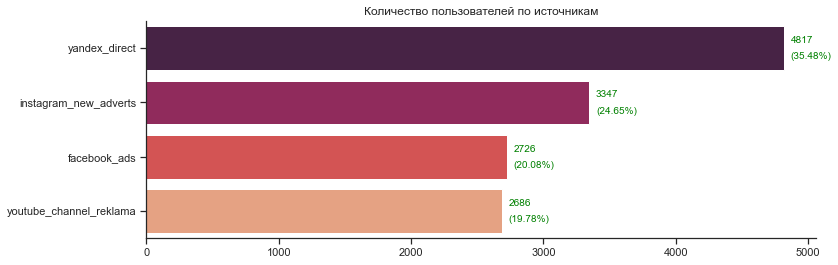

,user_count,event_count,events_per_user
source,,,
yandex_direct,4817,47694,9.901183
instagram_new_adverts,3347,33757,10.085748
facebook_ads,2726,27672,10.151137
youtube_channel_reklama,2686,26516,9.871929


In [54]:
rep = game_actions.groupby('source').agg(user_count = ('user_id', 'nunique'), event_count = ('user_id', 'count'))
rep['events_per_user'] = rep['event_count'] / rep['user_count']
rep = rep.sort_values('user_count', ascending=False)

sns.set_style("ticks")
plt.figure(figsize=(12, 4))
plt.title('Количество пользователей по источникам')
sns.barplot(y=rep.index, x=rep['user_count'], palette='rocket', orient='h')

for i, v in enumerate(rep['user_count'].values):
    plt.text(v + 50, i - 0.1, str(v), color='green', fontsize = 10)
    plt.text(v + 50, i + 0.2, '({:.2%})'.format(v / rep['user_count'].sum()), color='green', fontsize = 10)

plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

display(rep)

-  Больше всего пользователей пришло из Яндекс.Директ (4817), на втором месте Instagram (3347), далее Facebook (2726) и Youtube (2686).    
-  Ощутимой разницы в количестве событий на пользователя в зависимости от источника не наблюдается - около 10.

# Шаг 4 Расчём метрик

## 4.1 DAU, WAU,MAU, Sticky factor

Посчитаем и добавим в отчёт метрики посещаемости игры:

In [55]:
source_metrics = pd.DataFrame([
                        ['yandex_direct', None, None, None, None, None, None],
                        ['instagram_new_adverts', None, None, None, None, None, None],
                        ['facebook_ads', None, None, None, None, None, None],
                        ['youtube_channel_reklama', None, None, None, None, None, None],
                       ], columns = ['Источник', 
                                     'Пользователи',
                                     'DAU', 
                                     'WAU', 
                                     'MAU', 
                                     'Sticky factor (week)',
                                     'Sticky factor (month)']).set_index('Источник')

In [56]:
source_cnt = user_report.groupby('source')['user_id'].nunique()
for src in source_cnt.index:
    source_metrics.loc[source_metrics.index == src, ['Пользователи']] = source_cnt[src]

In [57]:
for source in game_actions['source'].unique():
    dau_total = game_actions[game_actions['source'] == source].groupby(['date']).agg({'user_id': 'nunique'}).mean()
    wau_total = game_actions[game_actions['source'] == source].groupby(['week']).agg({'user_id': 'nunique'}).mean()
    mau_total = game_actions[game_actions['source'] == source].groupby(['month']).agg({'user_id': 'nunique'}).mean()

    sticky_wau = dau_total / wau_total
    sticky_mau = dau_total / mau_total

    source_metrics.loc[source_metrics.index == source, ['DAU']] = [dau_total]
    source_metrics.loc[source_metrics.index == source, ['WAU']] = [wau_total]
    source_metrics.loc[source_metrics.index == source, ['MAU']] = [mau_total]
    source_metrics.loc[source_metrics.index == source, ['Sticky factor (week)']] = [round(sticky_wau,2)]
    source_metrics.loc[source_metrics.index == source, ['Sticky factor (month)']] = [round(sticky_mau,2)]

source_metrics

,Пользователи,DAU,WAU,MAU,Sticky factor (week),Sticky factor (month)
Источник,,,,,,
yandex_direct,4817,1018.727273,2161.2,2414.5,0.47,0.42
instagram_new_adverts,3347,716.575758,1520.0,1676.0,0.47,0.43
facebook_ads,2726,585.666667,1233.6,1366.0,0.47,0.43
youtube_channel_reklama,2686,581.53125,1205.2,1346.0,0.48,0.43


Если смотреть на относительные показатели (Sticky factor), заметно, что источники практически не отличаются друг от друга по показателям лояльности аудитории.

## 4.2 Retention Rate

In [58]:
first_activity_date = game_actions.groupby('user_id')['event_datetime'].min()
first_activity_date.name = 'first_activity_date'
retention_rate = pd.merge(game_actions, first_activity_date, on = 'user_id')
retention_rate['first_session_day'] = retention_rate['first_activity_date'].astype('datetime64[D]')
retention_rate['session_day'] = retention_rate['event_datetime'].astype('datetime64[D]')
retention_rate['cohort_lifetime'] = retention_rate['session_day'] - retention_rate['first_session_day']
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'] / np.timedelta64(1, 'D')
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'].round()
cohorts = retention_rate.groupby(['first_session_day', 'cohort_lifetime']).agg({'user_id' : 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_day', 'user_id']] 
initial_users_count = initial_users_count.rename(columns = {'user_id' : 'cohort_users'}) 
cohorts = pd.merge(cohorts, initial_users_count, on = 'first_session_day')
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index = 'first_session_day', 
                                      columns = 'cohort_lifetime', 
                                      values = 'retention', 
                                      aggfunc = 'sum')

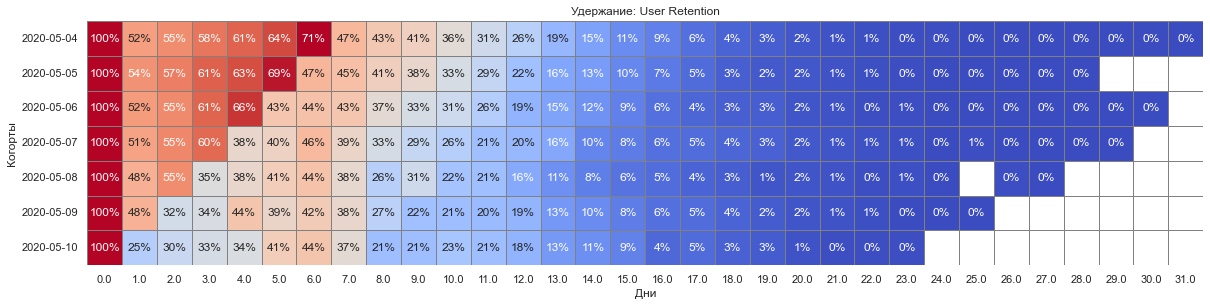

In [59]:
sns.set(style = 'white')
plt.figure(figsize = (20, 15))
plt.title('Удержание: User Retention')
sns.heatmap(retention_pivot, annot = True, fmt = '.0%', 
            linewidths = 1, linecolor = 'gray', 
            cmap = 'coolwarm', vmin = 0, vmax = 0.7, square=True, cbar=0,
            yticklabels = retention_pivot.index.date)
plt.ylabel('Когорты')
plt.xlabel('Дни')
plt.show()

- Удержание около 50% в первый день - это хороший результат для игры.
- В течение недели после запуска наблюдается прирост пользователей в каждой когорте - возможно, хорошо работали напоминания - маркетологам стоит обратить внимание на данный факт.
- Примерно на 10 день игры на следующий уровень уходят PvP игроки и 12 день PvE игроки.   
- Каждая последующая когорта в целом демонстрирует более скромные результаты, чем предыдущая, и выравниваются они только на 14-15 день игры, где остаётся только десятая часть игроков.

## 4.3 CAC

**Сколько стоило привлечение одного покупателя из каждого источника:**

Добавим в таблицу с событиями дату первого действия каждого пользователя:

In [60]:
user_first_event = user_report[['user_id', 'first_event_datetime']].rename(columns = {'first_event_datetime':'first_event_date'})
user_first_event['first_event_date'] = user_first_event['first_event_date'].dt.date

game_actions = game_actions.merge(user_first_event, how='left', on='user_id')

Посчитаем, сколько пользователей пришли в игру в разрезе источника и дня:

In [61]:
grp_src_users = game_actions.groupby(['source', 'first_event_date']).agg(users = ('user_id', 'nunique')).reset_index()
grp_src_users['first_event_date'] = grp_src_users['first_event_date'].astype('datetime64[s]')

Добавим в таблицу с затратами информацию о количестве привлечённых пользователей по дням:

In [62]:
ad_costs = ad_costs.merge(grp_src_users, left_on = ['source', 'day'], right_on = ['source', 'first_event_date'], how='outer').sort_values(by=['source','day'])

В целях расчёта САС сместим значения колонки users и first_event_date на шаг наверх и удалим строчки с пропусками в cost:

In [63]:
ad_costs['users'] = ad_costs['users'].shift(-1)
ad_costs['first_event_date'] = ad_costs['first_event_date'].shift(-1)
ad_costs = ad_costs.dropna(axis='index', how='any', subset=['cost'])

In [64]:
ad_costs['cac'] = ad_costs['cost'] / ad_costs['users']

In [65]:
source_cac = ad_costs.groupby('source').agg(cost=('cost', 'sum'), users=('users', 'sum'))
source_cac['CAC'] = source_cac['cost'] / source_cac['users']

In [66]:
source_cac

,cost,users,CAC
source,,,
facebook_ads,2140.904643,2726.0,0.785365
instagram_new_adverts,2161.441691,3347.0,0.645785
yandex_direct,2233.111449,4817.0,0.463590
youtube_channel_reklama,1068.119204,2686.0,0.397662


- Диапазон затрат на привлечение 1 пользователя разнится от 0,40 до 0,79.
- Cамым выгодным источником является youtube_channel_reklama. 

# Шаг 5. Проверка статистических гипотез

Зададим пороговый уровень статистической значимости:

In [67]:
alpha = 0.05

## 5.1 Время завершения уровня различается в зависимости от способа прохождения:
- **через реализацию проекта**
- **через победу над первым врагом**

- H0 = Различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком нет
- H1 = Различие времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком есть

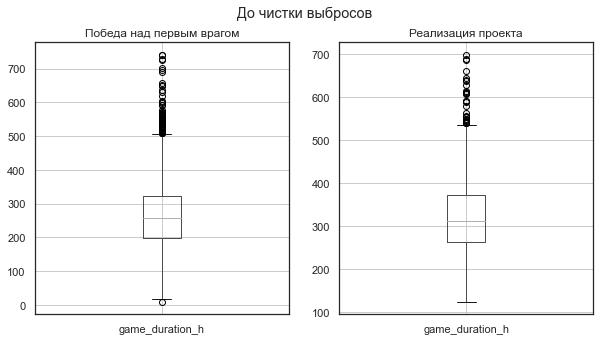

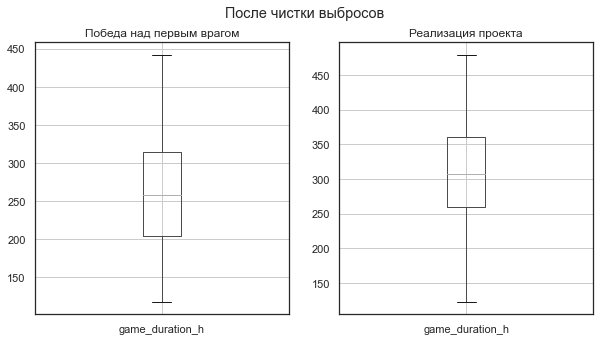

In [68]:
fight_duration = user_report[user_report['last_level_progress'] == 'defeated_first_enemy']['game_duration_h'].reset_index()
project_duration = user_report[user_report['last_level_progress'] == 'built_project']['game_duration_h'].reset_index()

fig, ax = plt.subplots(figsize = (10, 5))

fight_duration.boxplot('game_duration_h', ax = plt.subplot(1, 2, 1))
plt.title('Победа над первым врагом')
project_duration.boxplot('game_duration_h', ax = plt.subplot(1, 2, 2))
plt.title('Реализация проекта')

fig.suptitle('До чистки выбросов')
plt.show()

# Чистим выбросы:
fight_duration = fight_duration[fight_duration['game_duration_h'] < fight_duration['game_duration_h'].quantile(0.95)]
fight_duration = fight_duration[fight_duration['game_duration_h'] > fight_duration['game_duration_h'].quantile(0.05)]
project_duration = project_duration[project_duration['game_duration_h'] < project_duration['game_duration_h'].quantile(0.95)]

fig, ax = plt.subplots(figsize = (10, 5))

fight_duration.boxplot('game_duration_h', ax = plt.subplot(1, 2, 1))
plt.title('Победа над первым врагом')
project_duration.boxplot('game_duration_h', ax = plt.subplot(1, 2, 2))
plt.title('Реализация проекта')

fig.suptitle('После чистки выбросов')
plt.show()

Так как распределения длительности прохождения уровня стремятся к нормальному и не зависимы между собой, для проверки гипотезы мы можем использовать t-критерий Стьюдента:

- H0: медианная длительность прохождения уровня в обеих группах одинаковая


- H1: медианная длительность прохождения уровня в группах 1 и 2 отличается

In [69]:
pvalue = stats.ttest_ind(fight_duration['game_duration_h'].values, project_duration['game_duration_h'].values).pvalue

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mмедианная длительность прохождения уровня в обеих группах одинаковая.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mмедианная длительность прохождения уровня в группах А и В отличается.\033[0m')
    print(fight_duration['game_duration_h'].median(), project_duration['game_duration_h'].median())

p-value: 4.390727396900911e-111
Нулевая гипотеза отвергается: медианная длительность прохождения уровня в группах А и В отличается.
258.0 307.0


-  Пользователи, выбравшие стратегию строительства, в среднем проходят уровень дольше.

## 5.2 Количество построенных объектов не зависит от способа прохождения уровня

In [70]:
fight_building = user_report[user_report['last_level_progress'] == 'defeated_first_enemy']['building'].values
project_building = user_report[user_report['last_level_progress'] == 'built_project']['building'].values

Так как распределения количества объектов для разных способов прохождения уровня отличаются от нормального и их всего два, для проверки гипотезы мы можем использовать критерий Манна-Уиттни:

- H0: среднее количество построенных объектов одинаково для обоих способов прохождения уровня
    
    
- H1: среднее количество построенных объектов различается по способам прохождения уровня

In [71]:
pvalue = stats.mannwhitneyu(fight_building, project_building)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих способов прохождения уровня.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по способам прохождения уровня.\033[0m')
    print(round(fight_building.mean(), 2), round(project_building.mean(), 2))

p-value: 5.211926275022306e-305
Нулевая гипотеза отвергается: среднее количество построенных объектов различается по способам прохождения уровня.
9.41 12.65


Другой вариант:

- H0 = Количество построенных объектов одинаково для обоих способов прохождения уровня


- H1 = Количество построенных объектов различается по способам прохождения уровня

In [72]:
event_count = game_actions.query('(event != "project") and (event != "finished_stage_1")')\
                        .groupby(['user_id'])['event'].count().reset_index()

In [73]:
builders_buildings = event_count.query('user_id == @builders_id')
warriors_buildings = event_count.query('user_id == @warriors_id')

In [74]:
results = st.ttest_ind(builders_buildings['event'], warriors_buildings['event'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, количество построек у игроков различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, количество построек у игроков не различается")

p-значение:  0.0
Отвергаем нулевую гипотезу, количество построек у игроков различается


-  Cреднее количество построенных объектов различается по способам прохождения уровня

## 5.3 Динамика строительства зданий у клиентов с вероятностью ухода и в среднем по остальной выборке

Для проверки этой гипотезы нужно сперва обозначить пользователей, которые с большой долей вероятности прекратят пользоваться игрой.

In [75]:
game_actions['session_date'] = game_actions['event_datetime'].dt.date

In [76]:
buildings_grouped_by_cohorts = game_actions.query('event=="building"').groupby(
    ['first_event_date', 'session_date']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
buildings_grouped_by_cohorts.columns=['first_enter', 'session_date','users_number', 'events_number']

Определим среднее количество построек у одного пользователя buildings_per_user:

In [77]:
buildings_grouped_by_cohorts['buildings_per_user'] = (
    buildings_grouped_by_cohorts['events_number']
    / buildings_grouped_by_cohorts['users_number']
)

Найдём lifetime когорты:

In [78]:
buildings_grouped_by_cohorts = buildings_grouped_by_cohorts
buildings_grouped_by_cohorts['cohort_lifetime'] = (
    (buildings_grouped_by_cohorts['session_date']
    - buildings_grouped_by_cohorts['first_enter'])/ np.timedelta64(1, 'D')
)
buildings_grouped_by_cohorts['cohort_lifetime'] = buildings_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

Построим сводную таблицу изменения среднего количества построенных зданий, где в столбцах будет lifetime, а строках — когорты:

In [79]:
buildings_per_user_pivot = buildings_grouped_by_cohorts.pivot_table(
    index='first_enter',
    columns='cohort_lifetime',
    values='buildings_per_user',
    aggfunc='mean',
)

Построим тепловую карту:

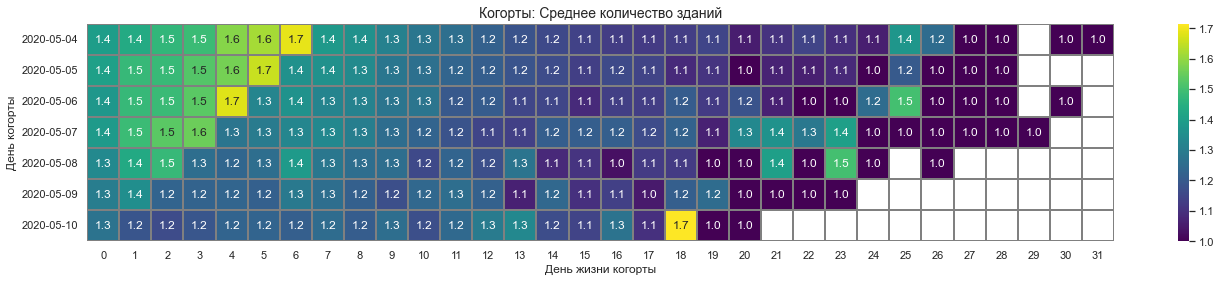

In [80]:
sns.set(style='white')
plt.figure(figsize=(23, 4))
plt.title('Когорты: Среднее количество зданий', size=14)
ax=sns.heatmap(buildings_per_user_pivot, annot=True, fmt='.1f', linewidths=.01, linecolor='gray', cmap="viridis")
ax.set_ylabel('День когорты')
ax.set_xlabel('День жизни когорты')
plt.show()

Максимальное среднее количество простроенных зданий в день - 1,7.

Добавим признак churn по пользователям у которых с даты последнего события прошло от 3 недель и проверим гипотезу.

Найдем последнее событие по каждому пользователю:

In [81]:
last_enter = game_actions.groupby(['user_id'])['session_date'].max()
last_enter.name = 'last_enter'
last_enter=last_enter.to_frame().reset_index()

Подсчитаем количество дней в течение которых пользователь неактивен:

In [82]:
last_enter['na_days'] = game_actions['session_date'].max()-last_enter['last_enter']
last_enter['na_days'] = last_enter['na_days'].dt.days

Добавим колонку churn:

In [83]:
def churn_flag(row):
    if row['na_days']>= 21:
        return 1
    return 0
last_enter['churn'] = last_enter.apply(churn_flag, axis=1)

Добавим маркер churn в датасет events:

In [84]:
game_actions = game_actions.merge(last_enter,on='user_id')

**Воспользуемся T-тестом для разности двух средних.**

H0: Динамика строительства зданий у клиентов с вероятностью ухода и в среднем по выборке одинакова

H1: Динамика строительства зданий у клиентов с вероятностью ухода и в среднем по выборке различна

In [85]:
results = st.ttest_ind(
    game_actions.query('churn==0').groupby('user_id').agg({'building_type': 'count'}).reset_index()['building_type'],
    game_actions.query('churn==1').groupby('user_id').agg({'building_type': 'count'}).reset_index()['building_type'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Выдвинутая гипотеза подтвердила различие в динамике строительства зданий у активных пользователей и пользователей попавших в отток.   

## 5.4 Количество построенных объектов не зависит от источника трафика

In [86]:
facebook = user_report[user_report['source'] == 'facebook_ads']['building'].values
yandex_direct = user_report[user_report['source'] == 'yandex_direct']['building'].values
youtube = user_report[user_report['source'] == 'youtube_channel_reklama']['building'].values
instagram = user_report[user_report['source'] == 'instagram_new_adverts']['building'].values

Так как распределения количества объектов по источникам отличаются от нормального и не зависят между собой, для проверки гипотезы воспользуемся критерием Краскелла-Уоллиса (многомерное обобщение критерия Уилкоксона-Манна-Уитни):

- H0: среднее количество построенных объектов не зависит от источника трафика


- H1: среднее количество построенных объектов зависит от источника трафика

In [87]:
pvalue = stats.kruskal(facebook, yandex_direct, youtube, instagram).pvalue

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов не зависит от источника трафика.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов по источникам отличается.\033[0m')
    print(facebook.mean(), yandex_direct.mean(), youtube.mean(), instagram.mean())

p-value: 0.023562546555828536
Нулевая гипотеза отвергается: среднее количество построенных объектов по источникам отличается.
9.585840058694057 9.348557193273821 9.299329858525688 9.50552733791455


- Мы получили статистически значимую разницу при сравнии среднего количества построенных объектов по источникам. Выясним подробнее, какие именно источники различаются:

Поскольку тестов у нас 6 (попарное сравнение 4 источников), проведём коррекцию уровня значимости методом Бонферрони:

In [88]:
alpha_b = alpha / 6

In [89]:
pvalue = stats.mannwhitneyu(yandex_direct, facebook)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(facebook.mean(), yandex_direct.mean())

p-value: 0.014383638324054673
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


In [90]:
pvalue = stats.mannwhitneyu(yandex_direct, youtube)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(yandex_direct.mean(), youtube.mean())

p-value: 0.6514154789589316
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


In [91]:
pvalue = stats.mannwhitneyu(yandex_direct, instagram)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(yandex_direct.mean(), instagram.mean())

p-value: 0.1018893572665771
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


In [92]:
pvalue = stats.mannwhitneyu(facebook, youtube)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(facebook.mean(), youtube.mean())

p-value: 0.010788356347116118
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


In [93]:
pvalue = stats.mannwhitneyu(facebook, instagram)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(facebook.mean(), instagram.mean())

p-value: 0.38716367306843236
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


In [94]:
pvalue = stats.mannwhitneyu(youtube, instagram)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha_b: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих источников.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по источникам.\033[0m')
    print(youtube.mean(), instagram.mean())

p-value: 0.06600456483354944
Нулевая гипотеза не отвергается: среднее количество построенных объектов одинаково для обоих источников.


Статистически значимая разница обнаружена для следующих пар источников:

- Facebook - Yandex.Директ (9.59 против 9.35)
- Facebook - YouTube (9.59 против 9.30)

# Шаг 6 Модель монетизации

## Проверим на окупаемость базовую модель

- 1 показ рекламы стоит 0.07 у.е.,



- Расчитаем окупаемость игры:

## 6.1 Прогнозирование LTV

Стоимость одного показа:

In [95]:
cpo = 0.07

In [96]:
buildings_grouped_by_cohorts['revenue']=buildings_grouped_by_cohorts['events_number']*cpo

Найдём LTV. Разделим валовую прибыль когорт за каждый день на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде тепловой карты:

In [97]:
buildings_grouped_by_cohorts['ltv'] = buildings_grouped_by_cohorts['revenue'] / buildings_grouped_by_cohorts['users_number']
    
output = buildings_grouped_by_cohorts.pivot_table(
        index='first_enter', 
        columns='cohort_lifetime', 
        values='ltv', 
        aggfunc='mean').round(2)
output=output.cumsum(axis=1).round(2)

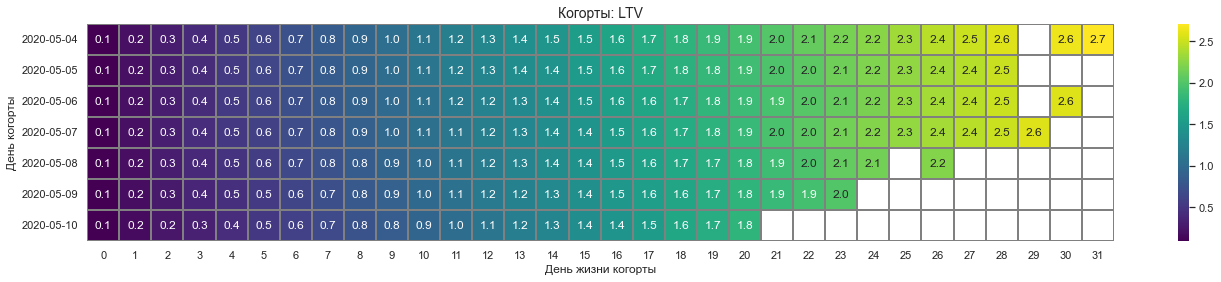

In [98]:
sns.set(style='white')
plt.figure(figsize=(23, 4))
plt.title('Когорты: LTV', size=14)
ax=sns.heatmap(output, annot=True, fmt='.1f', linewidths=.01, linecolor='gray', cmap="viridis")
ax.set_ylabel('День когорты')
ax.set_xlabel('День жизни когорты')
plt.show()

## 6.2 Рассчитаем ROMI по когортам

In [99]:
events_grouped_by_cohorts = game_actions.query('event=="building"').groupby(
    ['source','first_event_date','session_date']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
events_grouped_by_cohorts.columns=['source','first_enter', 'session_date','users_number', 'events_number']

In [100]:
events_grouped_by_cohorts = events_grouped_by_cohorts
events_grouped_by_cohorts['cohort_lifetime'] = (
    (events_grouped_by_cohorts['session_date']
    - events_grouped_by_cohorts['first_enter'])/ np.timedelta64(1, 'D')
)
events_grouped_by_cohorts['cohort_lifetime'] = events_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [101]:
romi=pd.merge(events_grouped_by_cohorts, ad_costs.drop(columns=['first_event_date','users']), on='source')

Чтобы посчитать накопительный ROMI, вызовем метод cumsum() - он последовательно сложит ROMI по cohort_lifetime:

In [102]:
romi['cac'] = romi['cost'] / romi['users_number']
romi['ltv'] = (romi['events_number']*cpo)/romi['users_number']
romi['romi'] = romi['ltv'] / romi['cac']
output = romi.pivot_table(
        index='first_enter',  
        columns='cohort_lifetime',
        values='romi', 
        aggfunc='mean')

output=output.cumsum(axis=1).round(2)

Построим тепловую карту:

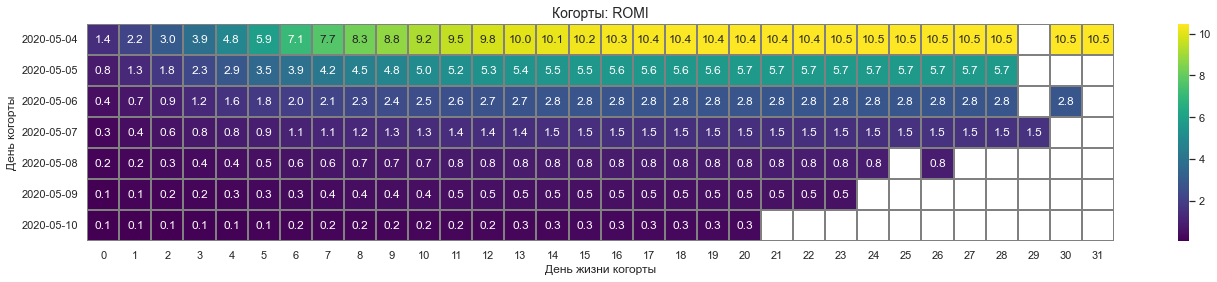

In [103]:
sns.set(style='white')
plt.figure(figsize=(23, 4))
plt.title('Когорты: ROMI', size=14)
ax=sns.heatmap(output, annot=True, fmt='.1f', linewidths=.01, linecolor='gray', cmap="viridis")
ax.set_ylabel('День когорты')
ax.set_xlabel('День жизни когорты')
plt.show()

Наблюдаем, что почти все когорты окупаются, но окупаемость падает, а значит нужно больше вкладываться в раскрутку, приобретая новых пользователей. 

## 6.3 Рассчитаем ROMI по источникам рекламы

In [104]:
events_grouped_by_source = game_actions.query('event=="building"').groupby(
    ['source']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
events_grouped_by_source.columns=['source', 'users_number', 'events_number']
events_grouped_by_source['revenue']=events_grouped_by_source['events_number']*cpo

In [105]:
costs_grouped_by_source=ad_costs.groupby('source')['cost'].sum().reset_index()

In [106]:
events_grouped_by_source=pd.merge(events_grouped_by_source, costs_grouped_by_source, on='source')

Будем рассчитывать ROMI как отношение выручки к затратам на рекламу в разрезе источников рекламы.

In [107]:
events_grouped_by_source['romi']=events_grouped_by_source['revenue']/events_grouped_by_source['cost']
events_grouped_by_source

,source,users_number,events_number,revenue,cost,romi
0,facebook_ads,2726,26131,1829.17,2140.904643,0.854391
1,instagram_new_adverts,3347,31815,2227.05,2161.441691,1.030354
2,yandex_direct,4817,45032,3152.24,2233.111449,1.411591
3,youtube_channel_reklama,2686,24978,1748.46,1068.119204,1.636952


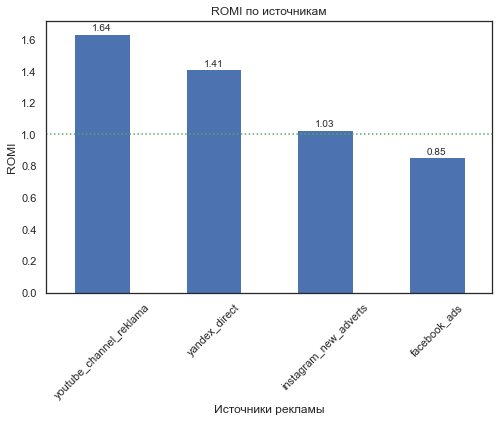

In [108]:
output = events_grouped_by_source.sort_values(by='romi', ascending=False).reset_index()

ax=output.plot(y='romi', x='source', kind='bar', figsize=(8, 5), title='ROMI по источникам', legend=False, rot=45)
plt.axhline(y=1, color='g', linestyle=':')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.02,
            '{:.2f}'.format(height),
            fontsize=10,
            ha="center")
plt.xlabel('Источники рекламы')
plt.ylabel('ROMI')
plt.show()

In [109]:
print('Cуммарный ROMI по всем источникам:',events_grouped_by_source['revenue'].sum()/events_grouped_by_source['cost'].sum())

Cуммарный ROMI по всем источникам: 1.1779876781103877


- ROMI окупилось по 3 источникам. 
- Facebook_ads не рекомендуем для размещения рекламы
- При цене показа рекламы 0.07 показ рекламы окупается. 
 И данный тип монетизации имеет право на жизнь

## Сформируем новую модель монетизации

- Так как базовая модель окупается, чтобы уменьшить рекламную нагрузку мы можем пойти по двум путям:
- 1) Увеличить стоимость показа рекламы ( но такой возможности, как я понимаю тут не предусмотрено)  
- 2) В рамках, указанной стоимости одного показа рекламы, но не теряя окупаемость, уменьшить количество показываемой рекламы ( не показывать её при постройки определённого здания, или , например, при постройке 1-го здания.)

**Предлагаем не показывать рекламы в момент постройки здания "research_center"**

In [110]:
game_actions_new = game_actions[game_actions['building_type'].isin(['spaceport','assembly_shop'])]

In [111]:
buildings_grouped_by_cohorts_new = game_actions_new.query('event=="building"').groupby(
    ['first_event_date', 'session_date']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
buildings_grouped_by_cohorts_new.columns=['first_enter', 'session_date','users_number', 'events_number']

In [112]:
buildings_grouped_by_cohorts_new['buildings_per_user'] = (
    buildings_grouped_by_cohorts_new['events_number']
    / buildings_grouped_by_cohorts_new['users_number']
)

In [113]:
buildings_grouped_by_cohorts_new = buildings_grouped_by_cohorts_new
buildings_grouped_by_cohorts_new['cohort_lifetime'] = (
    (buildings_grouped_by_cohorts_new['session_date']
    - buildings_grouped_by_cohorts_new['first_enter'])/ np.timedelta64(1, 'D')
)
buildings_grouped_by_cohorts_new['cohort_lifetime'] = buildings_grouped_by_cohorts_new['cohort_lifetime'].round().astype('int')

In [114]:
buildings_grouped_by_cohorts_new['revenue']=buildings_grouped_by_cohorts_new['events_number']*cpo

In [115]:
buildings_grouped_by_cohorts_new['ltv'] = buildings_grouped_by_cohorts_new['revenue'] / buildings_grouped_by_cohorts_new['users_number']
    
output = buildings_grouped_by_cohorts_new.pivot_table(
        index='first_enter', 
        columns='cohort_lifetime', 
        values='ltv', 
        aggfunc='mean').round(2)
output=output.cumsum(axis=1).round(2)

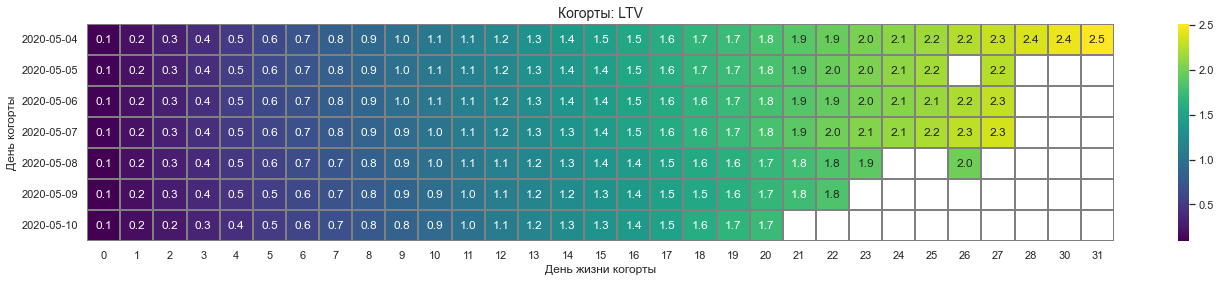

In [116]:
sns.set(style='white')
plt.figure(figsize=(23, 4))
plt.title('Когорты: LTV', size=14)
ax=sns.heatmap(output, annot=True, fmt='.1f', linewidths=.01, linecolor='gray', cmap="viridis")
ax.set_ylabel('День когорты')
ax.set_xlabel('День жизни когорты')
plt.show()

Рассчитаем ROMI по когортам:

In [117]:
events_grouped_by_cohorts_new = game_actions_new.query('event=="building"').groupby(
    ['source','first_event_date','session_date']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
events_grouped_by_cohorts_new.columns=['source','first_enter', 'session_date','users_number', 'events_number']

In [118]:
events_grouped_by_cohorts_new = events_grouped_by_cohorts_new
events_grouped_by_cohorts_new['cohort_lifetime'] = (
    (events_grouped_by_cohorts_new['session_date']
    - events_grouped_by_cohorts_new['first_enter'])/ np.timedelta64(1, 'D')
)
events_grouped_by_cohorts_new['cohort_lifetime'] = events_grouped_by_cohorts_new['cohort_lifetime'].round().astype('int')

In [119]:
romi_new=pd.merge(events_grouped_by_cohorts_new, ad_costs.drop(columns=['first_event_date','users']), on='source')

In [120]:
romi_new['cac'] = romi_new['cost'] / romi_new['users_number']
romi_new['ltv'] = (romi_new['events_number']*cpo)/romi_new['users_number']
romi_new['romi'] = romi_new['ltv'] / romi_new['cac']
output = romi_new.pivot_table(
        index='first_enter',  
        columns='cohort_lifetime',
        values='romi', 
        aggfunc='mean')

output=output.cumsum(axis=1).round(2)

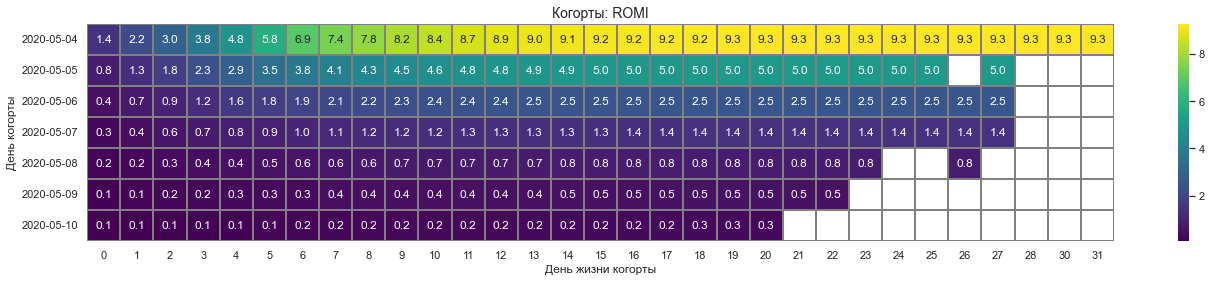

In [121]:
sns.set(style='white')
plt.figure(figsize=(23, 4))
plt.title('Когорты: ROMI', size=14)
ax=sns.heatmap(output, annot=True, fmt='.1f', linewidths=.01, linecolor='gray', cmap="viridis")
ax.set_ylabel('День когорты')
ax.set_xlabel('День жизни когорты')
plt.show()

Рассчитаем ROMI по источникам рекламы:

In [122]:
events_grouped_by_source_new = game_actions_new.query('event=="building"').groupby(
    ['source']
).agg({'user_id': 'nunique', 'event': 'count'}).reset_index()
events_grouped_by_source_new.columns=['source', 'users_number', 'events_number']
events_grouped_by_source_new['revenue']=events_grouped_by_source_new['events_number']*cpo

In [123]:
events_grouped_by_source_new=pd.merge(events_grouped_by_source_new, costs_grouped_by_source, on='source')

In [124]:
events_grouped_by_source_new['romi']=events_grouped_by_source_new['revenue']/events_grouped_by_source_new['cost']
events_grouped_by_source_new

,source,users_number,events_number,revenue,cost,romi
0,facebook_ads,2726,23186,1623.02,2140.904643,0.758100
1,instagram_new_adverts,3347,28278,1979.46,2161.441691,0.915805
2,yandex_direct,4817,40080,2805.60,2233.111449,1.256364
3,youtube_channel_reklama,2686,22275,1559.25,1068.119204,1.459809


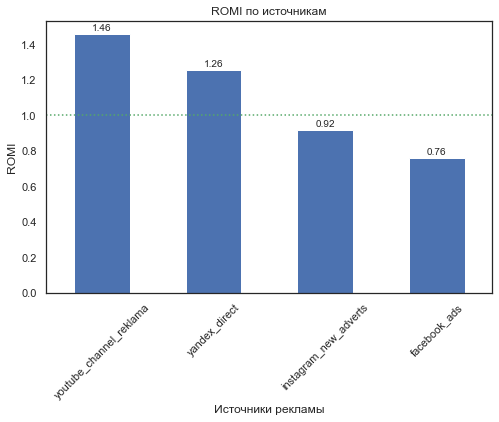

In [125]:
output = events_grouped_by_source_new.sort_values(by='romi', ascending=False).reset_index()

ax=output.plot(y='romi', x='source', kind='bar', figsize=(8, 5), title='ROMI по источникам', legend=False, rot=45)
plt.axhline(y=1, color='g', linestyle=':')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.02,
            '{:.2f}'.format(height),
            fontsize=10,
            ha="center")
plt.xlabel('Источники рекламы')
plt.ylabel('ROMI')
plt.show()

# Шаг 7 Общий вывод и рекомендации

 <div class="alert alert-info">
<h2> Общий вывод </h2>
    
- Кол-во уникальных пользователей: 135639
- Среднее кол-во пользователей в день: 1480
- Среднее время, за которое пользователь реализовывает проект: 13 дней
- Среднее время, за которое пользователь совершает победу над другим игроком: 10 дней
- Среднее время, за которое пользователь останавливается в прогрессе: 9 дней
- Большинство пользователей (57%) остановились в прогрессе и не прошли первый уровень.
    
    

- Общие траты на все каналы маркетинга - 7603.58
- Диапазон затрат на привлечение 1 пользователя разнится от 0,40 до 0,79, самым выгодным источником является youtube_channel_reklama.   
-  Больше всего пользователей пришло из Яндекс.Директ (4817), на втором месте Instagram (3347), далее Facebook (2726) и Youtube (2686).
- Ощутимой разницы в количестве событий на пользователя в зависимости от источника не наблюдается - около 10.
- Показатели лояльности аудитории (Sticky factor) по источникам практически не отличаются.
 
    
    
- Медианная длительность прохождения уровня отличается в зависимости от стратегии прохождения уровня. Пользователи, выбравшие стратегию строительства, в среднем проходят уровень дольше.
    
- Cреднее количество построенных объектов различается по способам прохождения уровня    

- Динамика строительства зданий у активных пользователей и пользователей попавших в отток различна. 
    
- Среднее количество построенных объектов различается только для следующих пар источников:
- Facebook - Yandex.Директ (9.59 против 9.35)
- Facebook - YouTube (9.59 против 9.30).
    
    
    
**Модель монетизации**

- Сформирована модель монетизации игрового приложения и произведен расчет при демонстрации рекламы на экране с выбором типа объекта для постройки('spaceport','assembly_shop') стоимостью - 0,07. Не показывая рекламу при постройке "research_center".
    

- При этом условии LTV достигает 2.5, а также окупаются следующие источники рекламы (Youtube - 1.46, Яндекс.Директ - 1.26).    

**Рекомендации**

-  активное привлечение пользователей через youtube_channel_reklama и yandex_direct с целью увеличения количества пользователей;
-  Также, согласно текущей модели монетизации сервиса, выручка с клиента зависит от количества построенных им объектов. Значит, нам выгоднее пользователи, предпочитающие стратегию строительства, а не сражение с врагом. Необходимо сбалансировать игровые стратегии, выровняв время прохождения уровня, чтобы сделать строительство более привлекательным для игроков. ( Например усилить защиту, которую было бы сложно сломить, не построив значительное количество зданий ).
    
    
<font color='blue'>  </font>